<a href="https://colab.research.google.com/github/M-MSilva/Forecasting-and-analyzing-the-Financial-Market/blob/main/jupyter%20notebook/Forecasting_and_analyzing_the_Financial_Market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forecasting and analyzing the Financial Market

## 1 - Introduction

A time series is basically a collection of observations ordered over time, in addition, time series can be made up of cycles, trends, seasonality and random components. Throughout this project I will address some of these elements.




## 2 - Project's goal

In this project, in addition to predicting Apple's stock price, we will answer some business questions:


1.   In which month are stocks the highest? What is this value?
2.   Which day were the stock values ​​highest?
3. Which day should we watch to maximize a stock's trading probability?

I would like to answer more questions, however our dataset has few columns.

## 3 - Initial Requeriments

Always at the beginning of a project we must import some elementary libraries.

In [54]:
# Common imports

import pandas as pd
import numpy as np

#images
import seaborn as sns
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
sns.set_theme()

## 4 - importing the data

After some necessary imports we must collect the data, for this we will use the pandas datareader module in order to consume the stooq API (similar to a yahoo finances that works) to collect financial data from the stock market.

In [55]:
#first we will create a dictionary so we can catch any of these actions
Mydict = {
            'Amazon':'AMZN',
            'Apple':'AAPL',
            'Walgreen':'WBA',
            'Northrop Grumman':'NOC',
            'Boeing':'BA',
            'Lockheed Martin':'LMT',
            'McDonalds':'MCD',
            'Intel':'INTC',
            'IBM':'IBM',
            'Texas Instruments':'TXN',
            'MasterCard':'MA',
            'Microsoft':'MSFT',
            'General Electrics':'GE',
            'American Express':'AXP',
            'Pepsi':'PEP',
            'Coca Cola':'KO',
            'Johnson & Johnson':'JNJ',
            'Toyota':'TM',
            'Honda':'HMC',
            'Exxon':'XOM',
            'Chevron':'CVX',
            'Valero Energy':'VLO',
            'Ford':'F',
            'Bank of America':'BAC',
            'DOW JONES INDUSTRIAL':'^DJI'
        }

We actually consume the API.

In [56]:
import pandas_datareader.data as web

#start and end of collection
start_date = "2012-01-01"

end_date = '2022-04-21'

#we create the dataframe
df = web.DataReader(Mydict['Apple'], 'stooq',start_date,end_date )

#change the order of indices
StooqData = df.reindex(index=df.index[::-1])

## 5 - Initial Data Insights

After all the initial setup we are ready to go to work and extract some precious information from our data. First, we use the head() method on the dataframe to better understand the dataset. 

### 5.1 - Glossary

In [57]:
StooqData.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,12.516,12.596,12.490,12.558,353412743
2012-01-04,12.523,12.662,12.498,12.625,304250563
2012-01-05,12.670,12.781,12.601,12.766,316930469
2012-01-06,12.819,12.911,12.802,12.900,372293045
2012-01-09,12.992,13.061,12.868,12.880,460604291


In this data set, we have:


* Open: The share price when the market opens;
* High: The high is the highest price at which a stock trades during a period;
* Low: The low is the lowest price of the period;
* Close: Share price when the market closes;
* Volume: is the total amount of trading activity.



### 5.2 - Dataset Summary

we can also get a description of the data with the info() method.

In [58]:
StooqData.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2593 entries, 2012-01-03 to 2022-04-21
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2593 non-null   float64
 1   High    2593 non-null   float64
 2   Low     2593 non-null   float64
 3   Close   2593 non-null   float64
 4   Volume  2593 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 121.5 KB


With this, we understand that we only have numerical data with the 5 columns above.

### 5.3 - Understanding the data

Now that we know what our numeric attributes are, we can plot them in the form of a histogram. Let's plot various stock information on the x-axis by the frequency density on the y-axis.

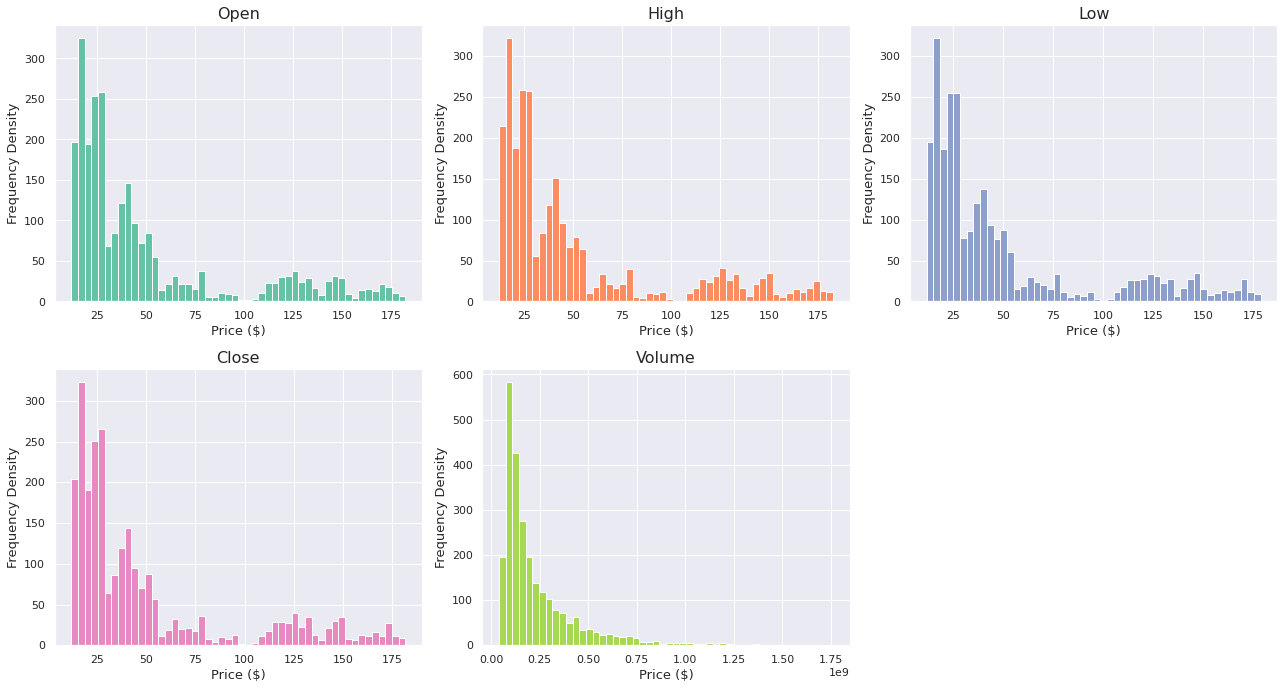

In [59]:
#so as not to spoil our original data
DatasetAux = StooqData.copy()

#list of our data
DataList = DatasetAux.columns.to_list()

#color map
cmap = mpl.cm.Set2

fig=plt.figure(figsize=(18,14))

#loop that plots all the charts we want, using the hist() method
for i, x, in enumerate(DataList):
  ax=fig.add_subplot(3,3,i+1)
  DatasetAux[x].hist(bins=50,ax=ax,color=cmap(i))
  ax.set_xlabel('Price ($)',fontsize=13)
  ax.set_ylabel('Frequency Density',fontsize=13)
  ax.set_title(x,fontsize=16)
fig.tight_layout()
plt.show()

We noticed that in all results the highest frequencies occur for low prices, in addition we noticed that our dataset has long tails in all attributes. Later on, maybe we will remedy these long tails.

To understand the data in an easier way, we will use the describe() method:

In [60]:
DatasetAux.describe()

,Open,High,Low,Close,Volume
count,2593.000000,2593.000000,2593.000000,2593.00000,2.593000e+03
mean,50.673522,51.216019,50.143314,50.70163,2.321887e+08
std,43.718442,44.250943,43.201463,43.75207,2.051087e+08
min,12.021000,12.382000,11.933000,12.10100,4.111250e+07
25%,21.530000,21.657000,21.284000,21.48400,1.024505e+08
50%,32.380000,32.400000,32.222000,32.31800,1.535729e+08
75%,54.983000,55.332000,54.503000,54.85600,2.862321e+08
max,182.130000,182.440000,178.630000,181.51000,1.759899e+09


and we noticed that several values are similar for Open, High, Low, Close.

## 6 - Visualizing data and Answering Some Business Questions

First let's visualize how our data varies over time.


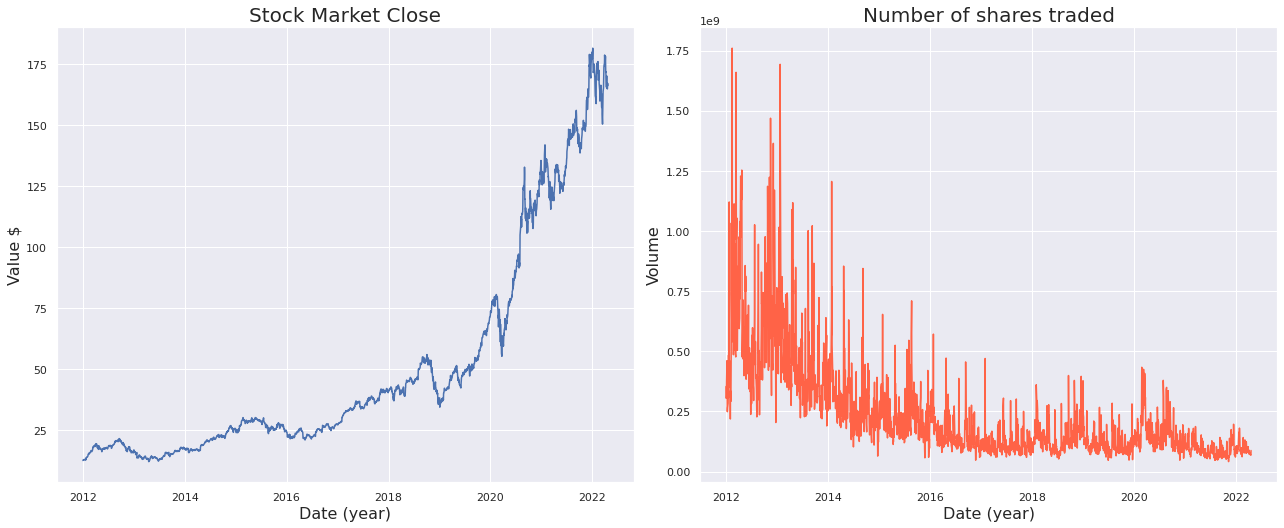

In [61]:

#we take the figure
fig=plt.figure(figsize=(18,14))

#we add the axis
ax=fig.add_subplot(2,2,1)

#we plot
ax.plot(DatasetAux['Close'])
ax.set_xlabel('Date (year)',fontsize=16)
ax.set_ylabel('Value $',fontsize=16)
ax.set_title('Stock Market Close',fontsize=20)
fig.tight_layout()

ax=fig.add_subplot(2,2,2)
ax.plot(DatasetAux['Volume'],color="tomato")
ax.set_xlabel('Date (year)',fontsize=16)
ax.set_ylabel('Volume',fontsize=16)
ax.set_title('Number of shares traded',fontsize=20)
fig.tight_layout()

plt.show()


Thus, in these two graphs we see that the value of the closing of a deal grows over time, while the volume of business decreases over time. I didn't plot any more graphs as they are very seedless.

If we want to know which month stocks have the highest gains, we first need to create a column titled month.

In [62]:
#we create a copy of our data
DatasetCopy = DatasetAux.copy()

#we reset the index to work with the dates, because in our index were the dates and we want numbers now
DatasetCopy.reset_index(inplace = True)

#we extract the months from our data using pd.DatetimeIndex( ).month method
DatasetCopy['Month'] = pd.DatetimeIndex(DatasetCopy['Date']).month

#voilà
DatasetCopy

,Date,Open,High,Low,Close,Volume,Month
0,2012-01-03,12.516,12.596,12.490,12.558,353412743,1
1,2012-01-04,12.523,12.662,12.498,12.625,304250563,1
2,2012-01-05,12.670,12.781,12.601,12.766,316930469,1
3,2012-01-06,12.819,12.911,12.802,12.900,372293045,1
4,2012-01-09,12.992,13.061,12.868,12.880,460604291,1
...,...,...,...,...,...,...,...
2588,2022-04-14,170.370,171.020,164.800,165.050,75440055,4
2589,2022-04-18,163.680,166.350,163.330,164.830,69125356,4
2590,2022-04-19,164.780,167.570,163.670,167.150,67823338,4
2591,2022-04-20,168.510,168.630,165.860,166.980,68029621,4


we plot

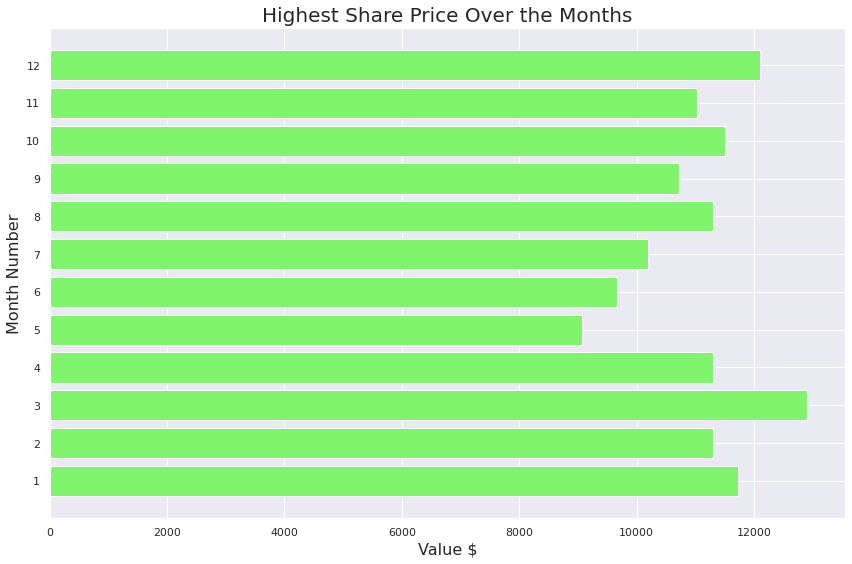

In [63]:
months = range(1,13)

#we group the month
results = DatasetCopy.groupby('Month').sum()

#figure to be plotted
fig=plt.figure(figsize=(12,8))

#plot
plt.yticks(months)
plt.ylabel('Month Number',fontsize=16)
plt.xlabel('Value $',fontsize=16)
plt.barh(months,results['High'],color='#7FF36B')
plt.title('Highest Share Price Over the Months',fontsize=20)
fig.tight_layout()
plt.show()

Based on this chart, we understand that the month in which the shares were at full value was March, followed by December. The graphs for the other columns in the dataset are too similar.

If we want to know exactly what the highest value is, just do:

In [64]:
max(results['High'])

12911.249

in the volume of business:

In [65]:
max(results['Volume']) #also occurred more frequently in March

61588607525

We may want to know which day the stock values were higher, for that we will do a similar procedure to what we did for the month.

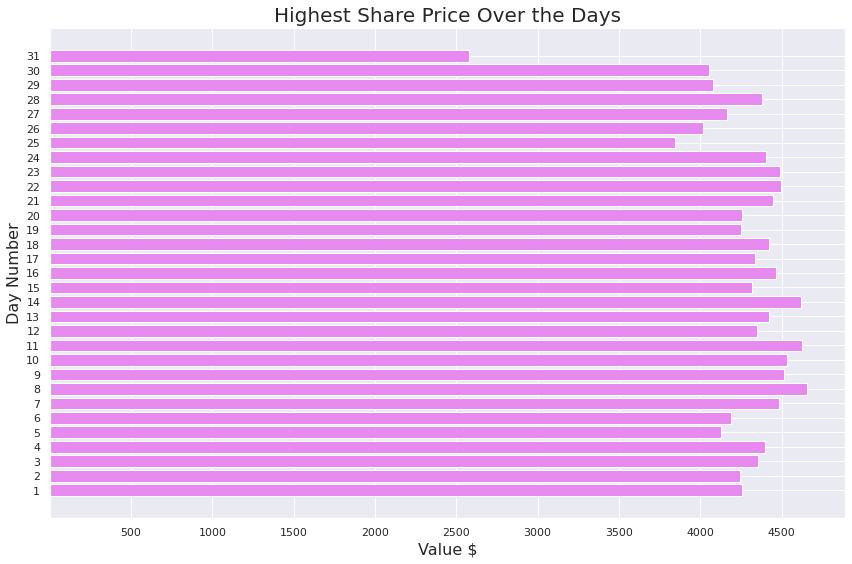

In [66]:
#we extract the days
DatasetCopy['Day'] = pd.DatetimeIndex(DatasetCopy['Date']).day

daysRange = range(1,32)

#group by day
days = DatasetCopy.groupby('Day').sum()

#plot
fig=plt.figure(figsize=(12,8))

plt.yticks(daysRange)
plt.xticks(np.arange(500.0, max(results['High'])+1, 500.0))

plt.ylabel('Day Number',fontsize=16)
plt.xlabel('Value $',fontsize=16)

plt.barh(daysRange,days['High'],color='#E68AF0')
plt.title('Highest Share Price Over the Days',fontsize=20)
fig.tight_layout()
plt.show()

The day on which the highest trading value of a share was obtained was the 8th, this value was above $ 4500 .

If we want to know which day to watch out for to maximize the probability of trading a stock, we must first group the data by day and by volume.

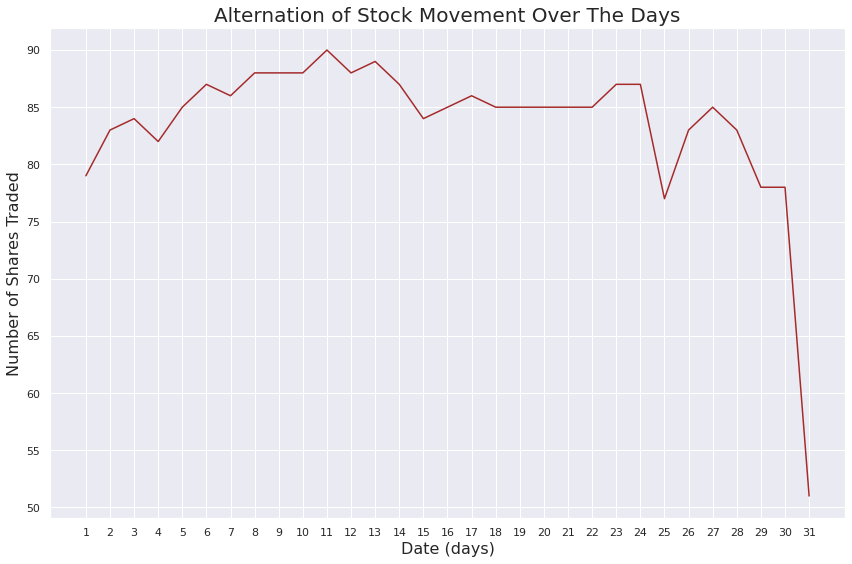

In [67]:
AnotherResult = DatasetCopy.groupby(['Day'])['Volume'].count()

#labels for days
labels = [hour for hour, DatasetCopy in DatasetCopy.groupby('Day')]

#plot
fig=plt.figure(figsize=(12,8))
plt.plot(labels, AnotherResult,color="brown")
plt.xticks(labels)
plt.title('Alternation of Stock Movement Over The Days',fontsize=20)
plt.xlabel('Date (days)',fontsize=16)
plt.ylabel('Number of Shares Traded',fontsize=16)
fig.tight_layout()
plt.show()

From the chart above, we understand that the trading peak occurs between the 8th and 13th, with the peak on the 11th, therefore, it is extremely important that shareholders be aware during this range of days.

## 7 - Exploratory data analysis and feature engineering

In this part of the code we will not handle the data, as this will be done in the next section.

### 7.1 - Autocorrelation

After the data visualization, it's time to explore the data. Primarily we will plot the autocorrelation graph, but what is autocorrelation? Basically correlation is the statistical association through two variables, so the autocorrelation between two time series is how similar a time series is in relation to a lagged version of the same series in a subsequent time interval. A correlation can be positive, negative, or zero (no correlation). Let's see our example below:

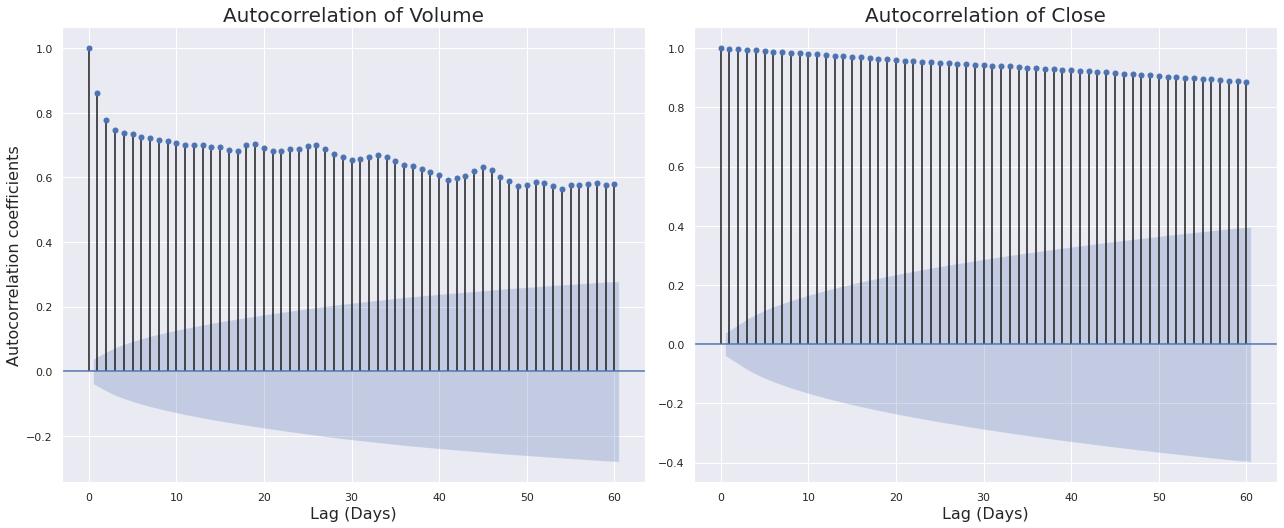

In [68]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

#we select the size of the figure
fig=plt.figure(figsize=(18,14))

#plot 
ax=fig.add_subplot(2,2,1)
ax.set_ylabel('Autocorrelation coefficients',fontsize=16)
ax.set_xlabel('Lag (Days)',fontsize=16)

plot_acf(DatasetAux['Volume'],ax,lags=60)
ax.set_title('Autocorrelation of Volume',fontsize=20)


#plot of another figure
ax=fig.add_subplot(2,2,2)
plot_acf(DatasetAux['Close'],ax,lags=60)
ax.set_xlabel('Lag (Days)',fontsize=16)
ax.set_title('Autocorrelation of Close',fontsize=20)


fig.tight_layout()
plt.show()

Here I plotted only two graphs for the autocorrelation, as the results for 'Close','Open','High','Low' are similar. In the first chart we see a high correlation on the 19th and on the 25th, due to the similarity of the variable y every 6 days we have a correlation every 6 days in the trading volume. In the second graph, the correlation decreases continuously.

###7.2 Partial Autocorrelation

Partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to terms at shorter lags.

Introductory Time Series with R .(Andrew V. Metcalfe, Paul S.P. Cowpertwait)

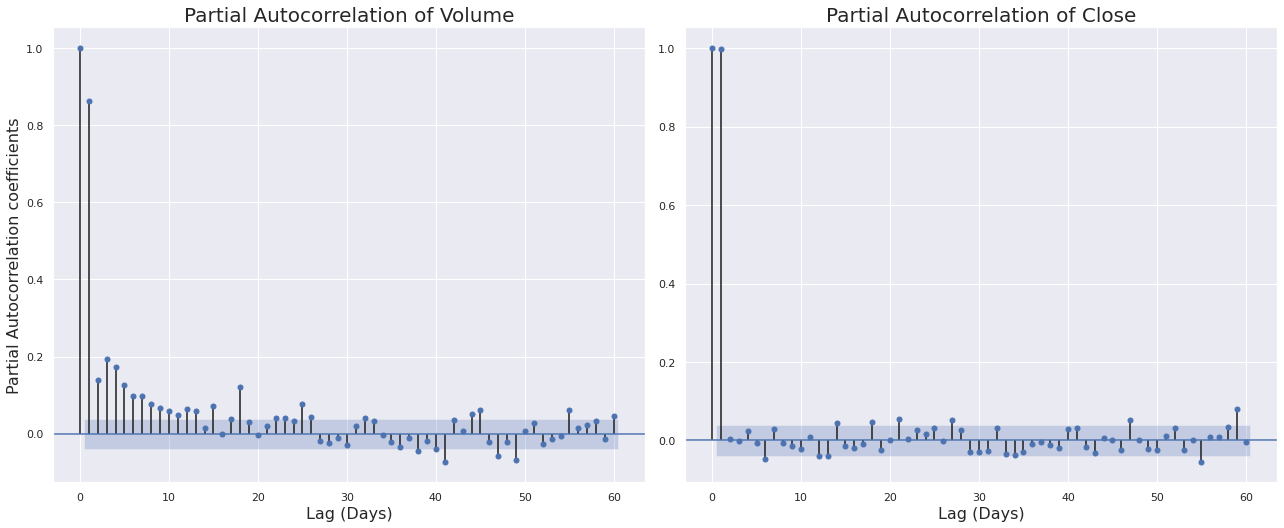

In [69]:
#we select the size of the figure
fig=plt.figure(figsize=(18,14))

#plot
ax=fig.add_subplot(2,2,1)
ax.set_ylabel('Partial Autocorrelation coefficients',fontsize=16)
ax.set_xlabel('Lag (Days)',fontsize=16)

plot_pacf(DatasetAux['Volume'],ax,lags=60)
ax.set_title('Partial Autocorrelation of Volume',fontsize=20)


#plot of another figure
ax=fig.add_subplot(2,2,2)
plot_pacf(DatasetAux['Close'],ax,lags=60)
ax.set_xlabel('Lag (Days)',fontsize=16)
ax.set_title('Partial Autocorrelation of Close',fontsize=20)


fig.tight_layout()
plt.show()

On the first chart it is quite difficult to see a pattern, but on the second chart there seems to be a pattern every 3 or 4 days.

Another important concept in time series is stationarity, which in the statistical context means that statistical properties such as mean and standard deviation do not change. Autocorrelation helps us to verify if our series is stationary or not, because if a time series decays in time slowly as in the case of the figure "Autocorrelation of Close" we say that the time series is non-stationary, if the time series decays instantaneously, that is not from the figure "Autocorrelation of Close" we say that the series is stationary. To test whether a time series is stationary or not mathematically we use the Dickey-Fuller test.

### 7.3 ADF test (Augmented Dickey-Fuller)

Before understanding what the ADF test is, we must know what the null hypothesis is. The null hypothesis of the test IN OUR CASE reports that our series is capable of being characterized by a unit root (non-stationary), the alternative hypothesis tells us that the series is time-stationary (giving up the null hypothesis).


Therefore, the ADF test will inform us if a series is stationary or not, in this test we will have results in tests of alternative or null hypotheses, whose solution will give us a p-value in which we will need to make inferences about the time series being stationary or not.

Without going into statistical details we will use an adfuller() function which, in addition to informing us of the p value, gives us the statistical value of the test, number of delays for test consideration and critical values. In this test, if p is greater than zero, we say that the process is not stationary, and if p is equal to zero, the process is stationary, through the null hypothesis.

In [70]:
#collect the values of the series
series = DatasetAux['Close'].values

from statsmodels.tsa.stattools import adfuller

#get the test result
result = adfuller(series, autolag='AIC')

In [71]:
#can plot some results
print('p-value: %f' % result[1])

print('ADF Statistic: %f' % result[0])

print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.4f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("Refuse Ho - Time Series is Stationary")
else:
    print ("Failed to refuse Ho - Time Series is Non-Stationary")

p-value: 0.998655
ADF Statistic: 1.986386
Critical Values:
	1%: -3.4329
	5%: -2.8627
	10%: -2.5674
Failed to refuse Ho - Time Series is Non-Stationary


Both statistically and by the p value we found that our series is non-stationary, since in the statistical test, the more negative this value is, the more likely we are to reject the null hypothesis and the series is stationary, however the ADF Statistic is not negative, so our series is not it is stationary.

### 7.4 - Seasonality


We can also say that the time series are stationary if there are no seasonal or trend phenomena. The trends tell us how the time series proceeds, that is, if it decreases, increases or if it remains stable, in our case we already know that the behavior of our time series is increasing. Seasonality is a pattern of resumption between some fixed period, here we will use the years to verify seasonality.

In [72]:
#we only select the years
DatasetCopy['Year'] = pd.DatetimeIndex(DatasetCopy['Date']).year

Text(0, 0.5, 'Closing Price $')

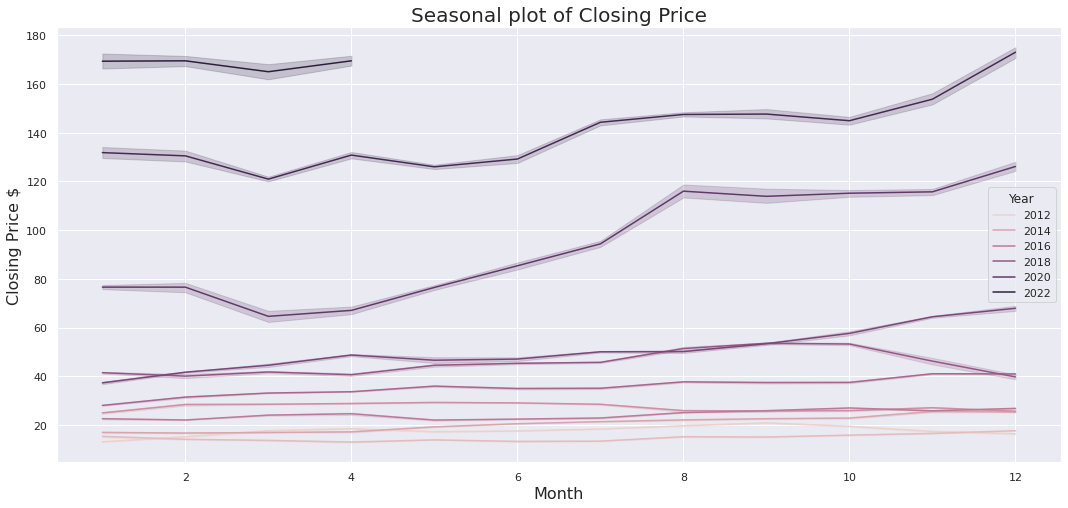

In [73]:
#plot
fig, ax = plt.subplots(figsize=(18, 8))

sns.lineplot(x=DatasetCopy['Month'], y=DatasetCopy['Close'], hue=DatasetCopy['Year'])
ax.set_title('Seasonal plot of Closing Price', fontsize = 20, loc='center')
ax.set_xlabel('Month', fontsize = 16)
ax.set_ylabel('Closing Price $', fontsize = 16)

Our graphs don't seem to have a seasonal pattern, like what a sine function has for example, however in the early years something is different. Let’s take a look at these more elucidated graphs in the early years:

In [74]:
anotherCopy = DatasetCopy[DatasetCopy['Year'] < 2018]

Text(0, 0.5, 'Closing Price $')

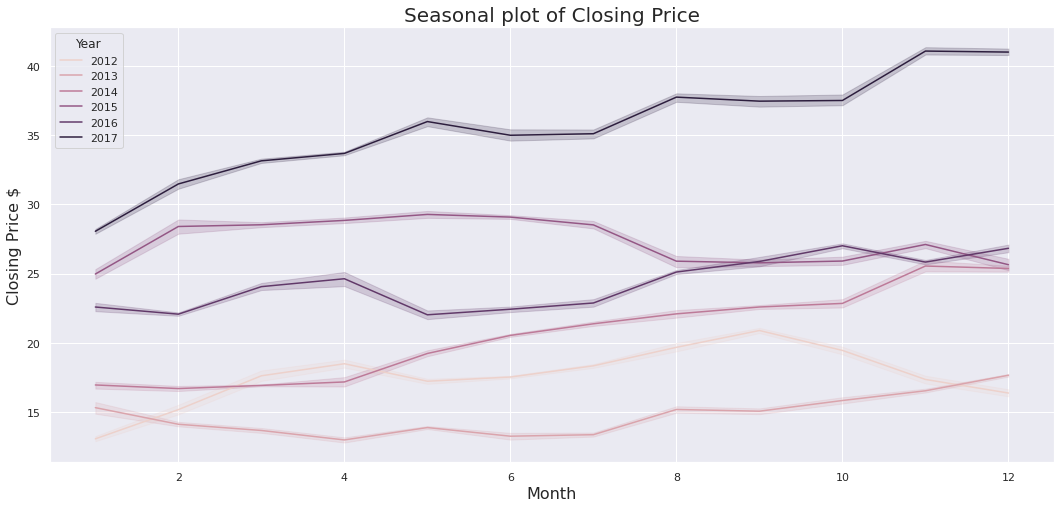

In [75]:
#similar plot
fig, ax = plt.subplots(figsize=(18, 8))

sns.lineplot(x=anotherCopy['Month'], y=anotherCopy['Close'], hue=anotherCopy['Year'])
ax.set_title('Seasonal plot of Closing Price', fontsize = 20, loc='center')
ax.set_xlabel('Month', fontsize = 16)
ax.set_ylabel('Closing Price $', fontsize = 16)

Some of these graphs seem to have seasonality, however, as the trend of these graphs is always growing, we never have an identical peak in the graphs, only similar.

### 7.5 - Transformations by Pipelines (Cleaning, Scaling)

In our dataset we have no missing values:

In [76]:
pd.isnull(StooqData).sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

however I will use the simple imputer, because we consume an api to collect the data and maybe in the future there will be missing values. Before we do something important, initially we will retain only the column that has the market closing price.

In [77]:
import math

#collect only the closing
Stooq = StooqData.filter(['Close'])

#get only the values
StooqDataValues = Stooq.values

As our data has many imperfections we must remedy them by employing a pepilines transformation, which sequentially applies various estimates and transformations to the data through the fit_transform() method. In our pipeline:


1.   First, we fill in the missing data in the dataset, with the column's median through the SimpleImputer(strategy='median') method;
2.   Finally, we use the MinMaxScaler(), which makes the data have similar weights, so that this normalization induces our data to be in a range from 0 to 1.



In [78]:
from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler,PowerTransformer


#pipeline that enforces the transformations
my_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median',add_indicator=True)),
        ('MinMaxScaler',MinMaxScaler()),
          
    ])

StooqData_tr = my_pipeline.fit_transform(StooqDataValues)

Do not use logarithmic transformation to remove long tails, as such preprocessing worsens some models.

### 7.6 - Splitting Data into Training and Testing

When dealing with a usual dataset, where the observations are not dependent on each other, we can randomly divide the training/test data, in time series the observations are dependent on each other, so we must divide the observations in conjunction with the observations. sequences. We are going to separate the data into training and testing in a different way as we will take the last 60 days for testing and the rest will be for training.

In [79]:
#number of rowa to train the model
training_data_len = math.ceil(len(StooqDataValues) * .8)

def createXYtrain():
  #we selected in the data only 80% of them
  train_data = StooqData_tr[0:training_data_len , :]


  #training lists
  X_train = []
  y_train = []

  for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i, 0]) #the last 60 values
    y_train.append(train_data[i, 0]) #information we want to predict

  X_train, y_train = np.array(X_train), np.array(y_train)#convert the data to a numpy array
  return X_train,y_train

We do similar for the test:

In [80]:
def createXYtest():
  test_data = StooqData_tr[training_data_len - 60: , :]

  #create the lists
  X_test = []

  y_test = StooqDataValues[training_data_len:, :] #y_test is what we are going to predict

  for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])#the last 60 values
  X_test = np.array(X_test)#convert the data to a numpy array

  return(X_test,y_test)

We call the function to create the training set and in the end convert them into an array to insert these data in our model.

In [81]:
X_train, y_train = createXYtrain()

the same for test

In [82]:
X_test,y_test=createXYtest()

##8 - Baseline

From here I will test several models and as you may have noticed I like to explain my steps, however,  will test so many models that I will only explain the final model chosen.

In [83]:
from tensorflow import keras

#initial model to be used
model = keras.models.Sequential([
    keras.layers.SimpleRNN(80, return_sequences=True, input_shape=(X_train.shape[1],1)),
    keras.layers.Dropout(0.2),
    keras.layers.SimpleRNN(80),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(25),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1)
])


### 8.1 - Compile and Fit

In recurrent neural network models we must compile and adjust the model, to initially configure the model for training and then adjust the model with fit().

In [84]:
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

def CompileAndFit(Mymodel):
  
  # the loss function is used to minimize the error
  # optimizer is used to try to find a global optimum
  Mymodel.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

  #batch_size is the total number of trainig examples present in a single batch, that will be propagated over the network
  #the epoch is the number of times the model will work on the training dataset
  Mymodel.fit(X_train,y_train,batch_size=1,epochs=1)

  return Mymodel

### 8.2 - Evaluation method in TRAINING SET

In this step we call the function to compile and adjust, then we perform the prediction, finally we want to have similar values that are in our y_test dataset, but why do that? We reverse the transformation of this data, since we performed some transformations initially, to leave the original data without any treatment.

In [85]:
import time 

#timer
inicioOne = time.time()

modelOne = CompileAndFit(model)

#prediction
aux = modelOne.predict(X_train)

#end of time count
fimOne = time.time()

#commented inversion
predictions = my_pipeline.inverse_transform(aux)

2015/2015 [==============================] - 37s 18ms/step - loss: 0.0286 - root_mean_squared_error: 0.1691


In [86]:
#we evaluate the training
modelOne.evaluate(X_train, y_train)

63/63 [==============================] - 1s 9ms/step - loss: 3.6033e-04 - root_mean_squared_error: 0.0190


[0.00036032687057740986, 0.018982278183102608]

We can also use some evaluation metrics:

In [87]:
from sklearn.metrics import mean_absolute_error

X_test,y_test=createXYtest()

X_train, y_train = createXYtrain()

rmse=np.sqrt(np.mean(((predictions - y_train)**2)))
mae = mean_absolute_error(y_train, predictions)

print(rmse,mae)

36.03497479456381 33.29919340494368


It is not very good.

### 8.3 Evaluation method in test set

In [88]:

#prediction
aux = modelOne.predict(X_test)

#inverse transformation
predictions = my_pipeline.inverse_transform(aux)

In [89]:
rmse=np.sqrt(np.mean(((predictions - y_test)**2)))
mae = mean_absolute_error(y_test, predictions)

print(rmse,mae)

34.52776521121181 31.578765096303577


improved a little.

## 9 - Looking for better models

### 9.1 - LSTM

An lsdm expects an input to be 3D (nSamples,NTimesteps,NFeatures) and since our X,y is two-dimensional let's remodel it.

In [90]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_train.shape

(2015, 60, 1)

We do the same with the test:

In [91]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

A Long Short-Term Memory (LSTM) neural network is a recurrent neural network (RNN) architecture that has cells that can understand and identify an important input, contain it in the long-term state, retain it for the desired time, and remove it when desired.
A Long Short-Term Memory (LSTM) neural network is a recurrent neural network (RNN) architecture that has cells that can understand and identify an important input, contain it in the long-term state, retain it for the desired time, and remove it when desired.

To learn more about LSTM read the articles:

https://arxiv.org/abs/1402.1128

https://arxiv.org/abs/1409.2329

In [92]:
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math

#use sequence sorting since we have a time series
modelTwo = Sequential()

#use 200 neurons and use one state output per time interval with return_sequences=True
#because this is the very first layer we need to give it a imput shape, 
#and the imput shape will be the number of time steps which is 60, and the number of features which is 1
modelTwo.add(LSTM(200,return_sequences=True,input_shape=(X_train.shape[1],1)))

#Regularization technique to improve accuracy
modelTwo.add(Dropout(0.1))

#second LSTM layer
modelTwo.add(LSTM(200,return_sequences=False)) #false because we are not going to use lsdm layers for our model anymore

#regularization
modelTwo.add(Dropout(0.1))

#the dense layer helps to change the dimensionality of the output of previous layers, to
#help the model understand the relationship between the values it operates on
modelTwo.add(Dense(25)) 

#regularization
modelTwo.add(Dropout(0.1))

#regular densely connected neural network layer with 1 neurons
modelTwo.add(Dense(1))

#### 9.1.1 - Evaluation LSTM method in TRAINING SET

In this part of the code we will initially count the execution time of the program, then we will compile and adjust the model with the created function. Finally, we predict and use the inverse transformation in a similar way to what was done in the previous model.

In [93]:
import time

inicioTwo = time.time()

modelTwo = CompileAndFit(modelTwo)

aux = modelTwo.predict(X_train)

predictions = my_pipeline.inverse_transform(aux)

fimTwo = time.time()

2015/2015 [==============================] - 182s 89ms/step - loss: 5.2811e-04 - root_mean_squared_error: 0.0230


We found the code execution time.

In [94]:
from math import fabs

print("Tempo de exexução do LSTM:",fabs(inicioTwo - fimTwo), "s")

Tempo de exexução do LSTM: 211.77917313575745 s


We evaluate the model on the training data with the evaluate method:

In [95]:
modelTwo.evaluate(X_train, y_train)

63/63 [==============================] - 7s 102ms/step - loss: 1.0023e-04 - root_mean_squared_error: 0.0100


[0.0001002299613901414, 0.010011491365730762]

Which seems to show good accuracy, however using the mean_absolute_error, mean_absolute_error and mean_absolute_percentage_error metrics:

In [96]:
from sklearn.metrics import mean_absolute_error

rmse=np.sqrt(np.mean(((predictions - y_train)**2)))
mae = mean_absolute_error(y_train, predictions)

print(rmse,mae)

35.5472290843022 32.314800932588966


We realize that our model is not that accurate.

#### 9.1.2 - Evaluation LSTM in the test set



We will now do a procedure similar to the previous one, only we do not collect the time.

In [97]:

#prediction
aux = modelTwo.predict(X_test)

#inverse transformation
predictions = my_pipeline.inverse_transform(aux)

With this, we can already see the accuracy:

In [98]:
rmse=np.sqrt(np.mean(((predictions - y_test)**2)))
mae = mean_absolute_error(y_test, predictions)

print(rmse,mae)

5.131535536557413 3.9385507679942955


which is much better than before.

### 9.2 - ARIMA

The ARIMA method is statistical and uses the most elementary AutoRegressive Moving Average extension that includes the concept of integration. Now in this method, we will first split the dataset in a different way, in addition we adjust the arima to produce a prediction on each item in the test data. In this case we are making a continuous prediction, since we have the dependence on previous temporary moments, therefore, our prediction can be made by re-elaborating the arima after each observation obtained. We also have how to analyze each data with the history list, which is fed with the training observations and later with new information aggregated in each repetition (loop) of the algorithm.


In the ARIMA model we need to select three important parameters:

1. p : The delay order, which is the amount of delay observations integrated in the model.

2. d : The degree of differentiation, which is the number of times the raw observations are differentiated.

3. q : The moving average, which is a fixed value of time series data that moves along the series, taking the elementary data from the previous average and collecting the posterior for each subsequent average.

The late order for the close 'p' can be 3 or 4, because of the partial autocorrelation plot. Initially we will use the parameters p=4,d=1,q=0, although 50 is the initial average that we found in our dataset we used q=0, because q=50 takes a long time.

In [99]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

import time
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

#get 80% of the data
train_size = int(len(StooqData_tr) * .8)

#80% of these data go to training and 20% to testing
train_tr, test_tr = StooqData_tr[0:train_size], StooqData_tr[train_size:]


history = [x for x in train_tr]
predictionsTwo = list()

#we start the model time count
inicioThree = time.time()

# walk-forward validation
for i in range(len(test_tr)):
	model = ARIMA(history, order=(4,1,0)) #model
	model_fit = model.fit()	#adjustment
	output = model_fit.forecast()[0] #desired forecast output
	predictionsTwo.append(output) #inserting the forecast into the forecast list
	obs = test_tr[i] 
	history.append(obs) #we insert the observations in the history

#inverse transformation for the predictions and for the test since both have already started treateds
finalPrediction = my_pipeline.inverse_transform(predictionsTwo) 
test = my_pipeline.inverse_transform(test_tr)

#model timer end
fimThree = time.time()


#### 9.2.1 - Evaluation Arima in the test set

In [100]:
rmse=np.sqrt(np.mean(((finalPrediction - test)**2)))

mae = mean_absolute_error(test, finalPrediction)

print(rmse,mae)


2.4857058861561416 1.8575749364138436


The arima model looks very good

#### 9.2.2 Comparing Run Times

Arima is more accurate than the LSTM model and faster:

In [101]:
from math import fabs

print("SimpleRNN Runtime:",fabs(inicioOne - fimOne), "s")

print("LSTM Runtime:",fabs(inicioTwo - fimTwo), "s")

print("ARIMA Runtime:",fabs(inicioThree - fimThree), "s")

SimpleRNN Runtime: 38.52177691459656 s
LSTM Runtime: 211.77917313575745 s
ARIMA Runtime: 119.57781147956848 s


## 10 - Viewing the Models

Although the arima is more accurate than the LSTM, it appears that the arima model is overfitting.

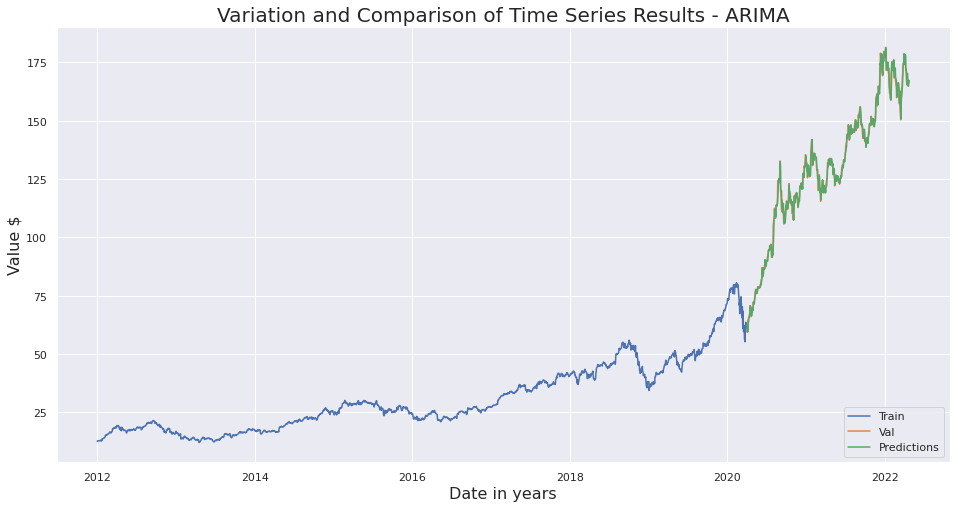

In [102]:
train = Stooq[:train_size].copy()
test = Stooq[train_size:].copy()
test['Predictions'] = finalPrediction

plt.figure(figsize=(16,8))
plt.plot(train['Close'])
plt.plot(test[['Close','Predictions']])
plt.title('Variation and Comparison of Time Series Results - ARIMA',fontsize=20)
plt.xlabel('Date in years',fontsize=16)
plt.ylabel('Value $',fontsize=16)
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

The graph for LSTM does not seem to overfit.

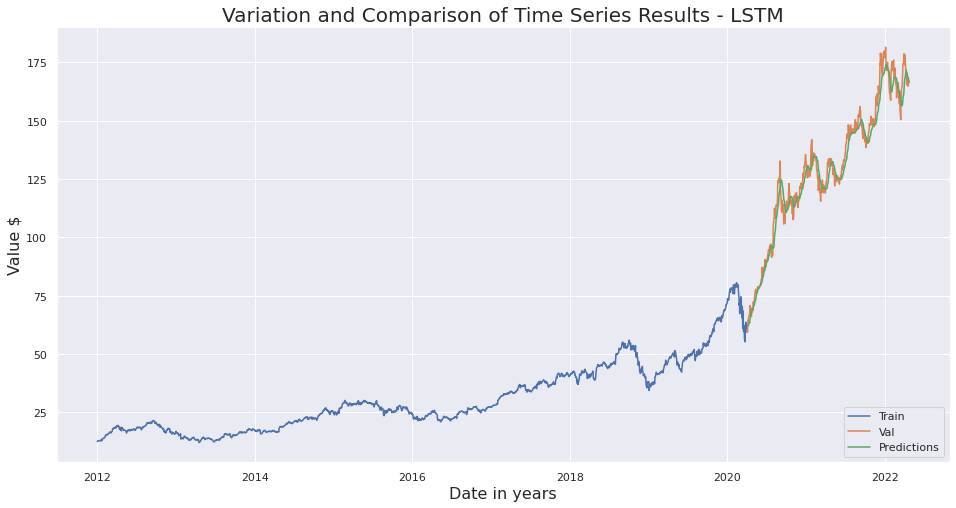

In [103]:
train = Stooq[:training_data_len].copy()
test = Stooq[training_data_len:].copy()

test['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.plot(train['Close'])
plt.plot(test[['Close','Predictions']])
plt.title('Variation and Comparison of Time Series Results - LSTM',fontsize=20)
plt.xlabel('Date in years',fontsize=16)
plt.ylabel('Value $',fontsize=16)
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

To make some prediction we first collect the data:

In [104]:
Another_df = web.DataReader(Mydict['Apple'], 'stooq',"2022-04-22","2022-04-22")

In [105]:
Another_df["Close"]

Date
2022-04-22    161.55
Name: Close, dtype: float64

So to know what the next market value will be using the LSTM model, we do:

In [106]:
#we took the last 60 days
last_days = Stooq[-60:].values

#do the data transformation
data_scaled = my_pipeline.transform(last_days)

#change the shape for the model to accept the data
X_test = np.reshape(data_scaled, (data_scaled.shape[1], data_scaled.shape[0],1))

#prediction
price = modelTwo.predict(X_test)

#return the data so that it remains untreated
prediction = my_pipeline.inverse_transform(price)

#result
print('Forecast LSTM: $ %f ' % prediction)

Forecast LSTM: $ 165.889709 


In arima

In [107]:
#we call the fitted model
output = model_fit.forecast()[0]

#we reshape the data
output = output.reshape(-1, 1)

#we do the inverse transformation
forecast = my_pipeline.inverse_transform(output)

print('Forecast ARIMA: $ %f' % forecast)

Forecast ARIMA: $ 166.999041


## 11 - Conclusion

Although the Arima model is more accurate he overfitting, the LSTM model looks more promising just because it doesn't overfit, but its runtime is also longer.

**Observations**

This project was not implemented in the cloud,
because one of the best practices of deploying temporary series
is every time you have a new data to train the model, as
the hosting I usually use is free with limitations,
I chose not to implement the model in the cloud or even serialize it.